In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Load the file specifying the character that separates values, and skipping the first 12 rows
data0 = np.genfromtxt('Mouse number 0.csv', dtype=[('clusterid', int), ('time', float), ('category', '<16U')], delimiter=',', skip_header=1, usecols = (0, 1, 4))
data0['time']

array([  4.00000000e-03,   3.47000000e-02,   3.53333333e-02, ...,
         3.59886180e+03,   3.59897837e+03,   3.59929400e+03])

In [3]:
#np.genfromtxt?

In [4]:
data0

array([(130,   4.00000000e-03, 'fast regular'),
       (130,   3.47000000e-02, 'fast regular'),
       (130,   3.53333333e-02, 'fast regular'), ...,
       (136,   3.59886180e+03, 'slow irregular'),
       (136,   3.59897837e+03, 'slow irregular'),
       (136,   3.59929400e+03, 'slow irregular')],
      dtype=[('clusterid', '<i8'), ('time', '<f8'), ('category', '<U16')])

In [5]:
data0.shape

(601542,)

In [6]:
x=np.unique(data0['clusterid'])

In [7]:
#x

In [8]:
y = []
for i in np.unique(x):
    y.append(data0['time'][np.where(data0['clusterid']==i)])
    #y[x[i]==data0[:,1]]
    

In [9]:

#print(y[1])

In [10]:
#y

In [11]:
import os
import neo
import pickle
import numpy as np
# import distutils.util
from quantities import s,us
import matplotlib.pyplot as plt
help(max)

Help on built-in function max in module builtins:

max(...)
    max(iterable, *[, default=obj, key=func]) -> value
    max(arg1, arg2, *args, *[, key=func]) -> value
    
    With a single iterable argument, return its biggest item. The
    default keyword-only argument specifies an object to return if
    the provided iterable is empty.
    With two or more arguments, return the largest argument.



In [12]:
#maximum and minimum time of recordings
t_start=min(data0['time'])
t_stop=max(data0['time'])
print(t_start)
print(t_stop)

0.004
3599.99973333


In [13]:
train=[]
for i,cl in enumerate(x):
  #  train_trial = y[i]
    train.append(neo.SpikeTrain(y[i]*s,
                            t_start=0*s,
                            t_stop=3600*s, name=cl))
    
    
    #append the spike train to the segment

    

In [14]:
#train

In [15]:
np.savetxt('spiketrains3.csv', train, delimiter=',', fmt='%s')

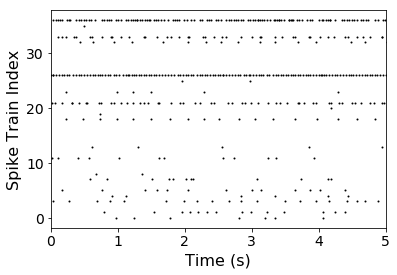

In [16]:
# plot spike trains
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
for i, spiketrain in enumerate(train):
    t = spiketrain.rescale(s)
    plt.plot(t, i* np.ones_like(t), 'k.', markersize=2)
plt.axis('tight')
plt.xlim(0, 5)
plt.xlabel('Time (s)', fontsize=16)
plt.ylabel('Spike Train Index', fontsize=16)
plt.gca().tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [17]:
import elephant

In [18]:
from elephant.statistics import isi, cv
cv_list = [cv(isi(spiketrain)) for spiketrain in train]

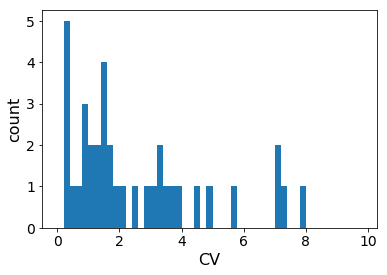

In [19]:
%matplotlib inline
plt.hist(cv_list,bins=np.arange(50)/5)
plt.xlabel('CV', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.gca().tick_params(axis='both', which='major', labelsize=14)
plt.show()

In [20]:
cv_list = np.asarray(cv_list)


In [21]:
#cv_list

In [22]:
np.savetxt('CVs3.csv', cv_list, delimiter=',', fmt='%f')


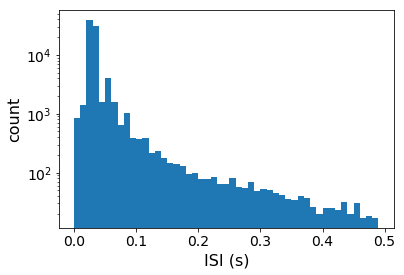

In [23]:
#calculate ISI
ISI_trains = [(isi(spiketrain)) for spiketrain in train]
isi_spiketrain=isi(spiketrain)
plt.hist(isi_spiketrain.magnitude,bins=np.arange(50)/100)
plt.semilogy()
plt.xlabel('ISI (s)', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.gca().tick_params(axis='both', which='major', labelsize=14)
plt.show()
#isi_spiketrain.magnitude

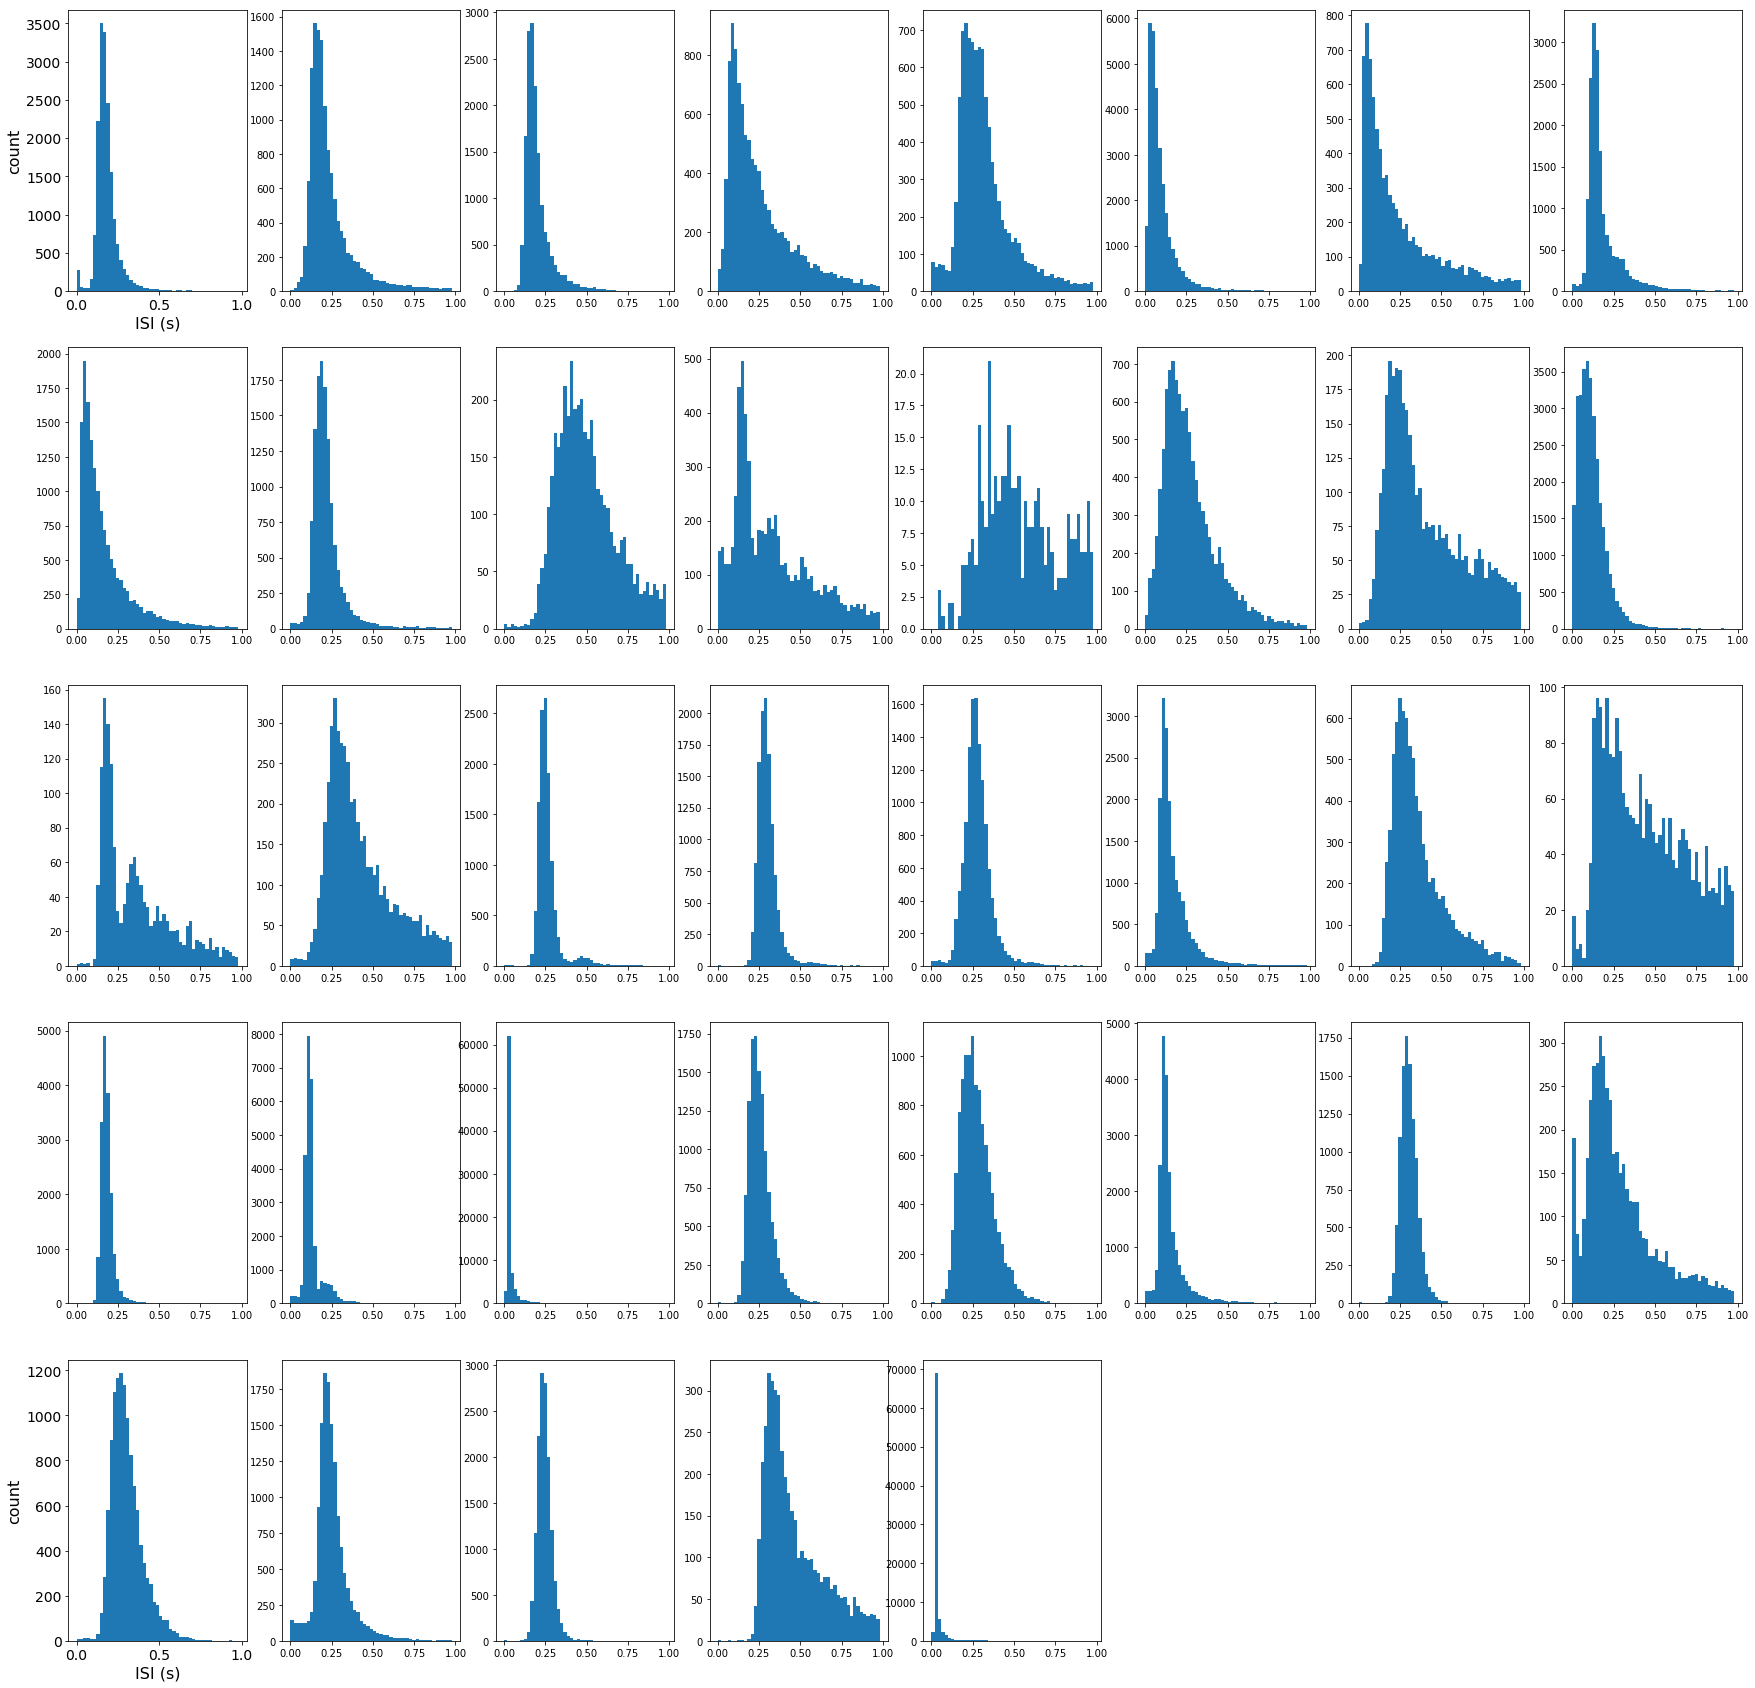

In [25]:
ISI_trains = [(isi(spiketrain)) for spiketrain in train]
i=1
plt.figure(figsize=(30,30))
for ISI in ISI_trains:
    
    plt.subplot(5,8,i)
    plt.hist(ISI,bins=np.arange(50)/50)
    #plt.semilogy()
    if i==1:
    
        plt.xlabel('ISI (s)', fontsize=16)
        plt.ylabel('count', fontsize=16)
        plt.gca().tick_params(axis='both', which='major', labelsize=14)
    elif i==33:
        
        plt.xlabel('ISI (s)', fontsize=16)
        plt.ylabel('count', fontsize=16)
        plt.gca().tick_params(axis='both', which='major', labelsize=14)
    
    i=i+1

In [27]:
np.savetxt('ISI3.csv', isi_spiketrain, delimiter=',', fmt='%f')

In [28]:
isi_spiketrain

array([ 0.036     ,  0.0337    ,  0.03666667, ...,  0.56986667,
        1.0076    ,  0.24626667]) * s

In [26]:
#mean firing rate calculation
iFr = []
for iTr in range(len(train)):
    iFr.append(elephant.statistics.instantaneous_rate(train[iTr], .02*s, kernel='auto', 
                                                        cutoff=5.0, t_start=0*s, t_stop=3600*s, trim=False))
  #  train_trial = y[i]
    
    
    #ifr_spiketrain [i] = elephant.statistics.instantaneous_rate(train[i], .02*s, kernel='auto', 
                                                        #cutoff=5.0, t_start=0*s, t_stop=1000*s, trim=False)

   # plt.plot(iFr.magnitude)
iFr = np.asarray(iFr)


/home/ocnc/.local/lib/python3.6/site-packages/elephant/statistics.py:817: UserWarning: Instantaneous firing rate approximation contains negative values, possibly caused due to machine precision errors.
  warnings.warn("Instantaneous firing rate approximation contains "


In [29]:
#plt.plot(iFr[2])

In [30]:
iFr.shape


(37, 180000, 1)

In [31]:
iFr
np.savetxt('meanfiringrates3.csv', iFr, delimiter=',', fmt='%f')

In [42]:
from elephant.conversion import BinnedSpikeTrain
cch =elephant.spike_train_correlation.cch(BinnedSpikeTrain(train, binsize=.05*s), BinnedSpikeTrain(train, binsize=.05*s), window='full', border_correction=False, binary=False, kernel=None, method='speed', cross_corr_coef=False)



ValueError: could not broadcast input array from shape (143999,1) into shape (143999)

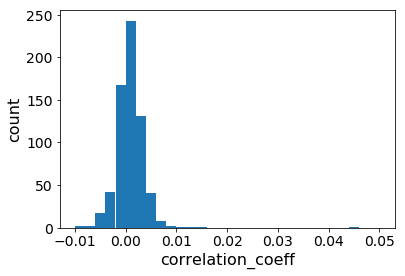

In [32]:
#correlation coeff between spike trains
from elephant.conversion import BinnedSpikeTrain
cc_matrix = elephant.spike_train_correlation.corrcoef(BinnedSpikeTrain(train, binsize=.005*s))

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

plt.hist(cc_matrix[np.tri(cc_matrix.shape[0], k=-1)==True],bins=np.arange(-.01, .0500001, 0.002))
#plt.semilogy()
plt.xlabel('correlation_coeff', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.gca().tick_params(axis='both', which='major', labelsize=14)

plt.show()

In [33]:
np.tri?

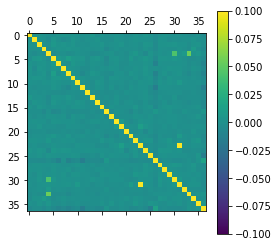

In [34]:
plt.matshow(cc_matrix,vmin=-0.1,vmax=0.1)
plt.colorbar()

/home/ocnc/anaconda3/envs/ocnc2018/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


NameError: name 'fig' is not defined

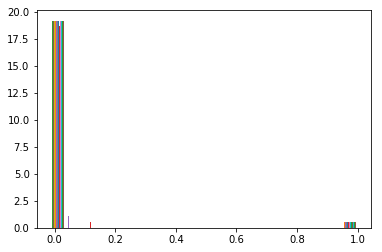

In [35]:
# Make a multiple-histogram of data-sets with different length.
#x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
n_bins = 20

plt.hist(cc_matrix, n_bins, normed=1, histtype='bar')



fig.tight_layout()
plt.show()

In [36]:
cc_matrix
np.savetxt('corrcoeff3.csv', cc_matrix, delimiter=',', fmt='%f')


In [ ]:
min(len(train[1]), len(train[2]))